1. O trabalho consiste em escrever um aplicativo em Python que colete dados de pelo menos duas variáveis econômicas para as quais faça algum sentido investigar a relação entre elas;

2. O aplicativo deve buscar os dados das variáveis em uma base de dados pública.

3. A busca deve ser realizada por API com o Pandas importando os dados em formato CSV ou realizando webscrapping com BeautifulSoup4 (1,0 ponto extra);

4. Caso o download dos dados seja realizado manualmente, não se acrescentam pontos adicionais.

5. Dados armazenados em uma base de dados SQLite3 para posterior importação para o Pandas (1,0 ponto extra).

6. O aplicativo deverá realizar a análise exploratória dos dados apresentando as estatísticas descritivas, o gráfico das séries coletadas com o Pandas. (1,0 ponto)

7. Usando pacote StatsModels o aplicativo deverá realizar o teste ADF nas séries (1,0 ponto)

8. Usando o pacote StatsModels, o aplicativo deverá realizar a regressão linear entre as variáveis da base de dados, compreendendo TODA a análise econométrica do modelo de regressão linear clássico, isto é, teste de heterocedasticidade, correlação serial sobre os resíduos. Supõe-se aqui um trabalho econométrico adequado e não apenas que as saídas do código produzido sejam publicadas. Esta análise deverá gerar um relatório escrito. (6,0 pontos).

9. Usando pacote StatsModels o aplicativo deverá realizar o teste de cointegração de Johansen nas séries (1,0 ponto)

10. O aplicativo deverá salvar os resultados em arquivos (1,0 ponto)

11. Se o relatório for escrito usando o Jupyter Notebook de tal forma que o código também esteja embutido no texto (1,0 ponto extra).

12. Todos os arquivos gerados bem como código fonte devem ser publicados no github;

13. Deve haver pelo menos 2 arquivos no github: o código fonte python; o arquivo com o trabalho escrito em Jupyter Notebook.

Primeiro passo: importar módulos

In [57]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

3 A busca deve ser realizada por API com o Pandas importando os dados em formato CSV ou realizando webscrapping com BeautifulSoup4 (1,0 ponto extra);

baixei essa série para ir testando os códigos do resto do trabalho, não para ser a série definitiva

url do BCB para api de csv : https://dadosabertos.bcb.gov.br/dataset/20542-saldo-da-carteira-de-credito-com-recursos-livres---total/resource/42454ae1-fea4-47df-b38a-101d8a62dbed?inner_span=True

In [8]:
url_serie_PIBaprecosdemercado = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.22109/dados?formato=csv&dataInicial=01/01/1995&dataFinal=01/01/2018'
url_serie_exportacao = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.22114/dados?formato=csv&dataInicial=01/01/1995&dataFinal=01/01/2018'

serie1 = pandas.read_csv(url_serie_PIBaprecosdemercado,sep = ";", decimal = ",")
serie2 = pandas.read_csv(url_serie_exportacao,sep = ";", decimal = ",")

Para checar se a série foi lida pelo pandas

In [9]:
serie1.head()

,data,valor
0,01/01/1996,100.47
1,01/04/1996,100.71
2,01/07/1996,104.31
3,01/10/1996,103.37
4,01/01/1997,104.40


In [10]:
serie2.head()

,data,valor
0,01/01/1996,98.06
1,01/04/1996,95.91
2,01/07/1996,95.61
3,01/10/1996,100.43
4,01/01/1997,105.16


6 O aplicativo deverá realizar a análise exploratória dos dados apresentando as estatísticas descritivas, o gráfico das séries coletadas com o Pandas. (1,0 ponto)

Para mostrar o gráfico da série

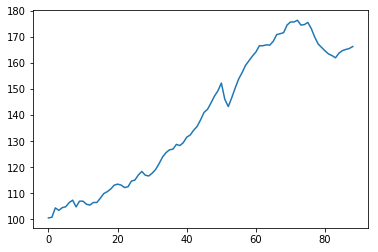

In [11]:
plt.plot(serie1.valor)
plt.show()

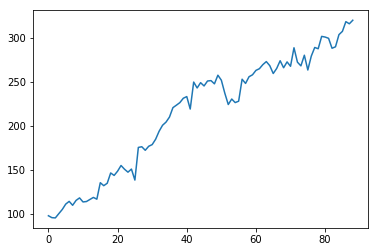

In [12]:
plt.plot(serie2.valor)
plt.show()

Para analise descritiva

In [13]:
print("média PIB= %f" % serie1.mean())
print("desvio padrão PIB = %f" % serie1.sem())
print("média Exportacao= %f" % serie2.mean())
print("desvio padrão Exportacao = %f" % serie2.sem())

média PIB= 138.667528
desvio padrão PIB = 2.731518
média Exportacao= 214.427865
desvio padrão Exportacao = 7.114966


7 Usando pacote StatsModels o aplicativo deverá realizar o teste ADF nas séries (1,0 ponto)

In [14]:
print("Para PIB")
result1 = adfuller(serie1.valor)
print('ADF Statistic: %f' % result1[0])
print('p-value: %f' % result1[1])
print('Critical Values:')
for key, value in result1[4].items():
	print('\t%s: %.3f' % (key, value))
    
print("Para Exportacao")
result2 = adfuller(serie2.valor)
print('ADF Statistic: %f' % result2[0])
print('p-value: %f' % result2[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

Para PIB
ADF Statistic: -1.102723
p-value: 0.713985
Critical Values:
	1%: -3.508
	5%: -2.895
	10%: -2.585
Para Exportacao
ADF Statistic: -0.875695
p-value: 0.795871
Critical Values:


NameError: name 'result' is not defined

8 Usando o pacote StatsModels, o aplicativo deverá realizar a regressão linear entre as variáveis da base de dados, compreendendo TODA a análise econométrica do modelo de regressão linear clássico, isto é, teste de heterocedasticidade, correlação serial sobre os resíduos. Supõe-se aqui um trabalho econométrico adequado e não apenas que as saídas do código produzido sejam publicadas. Esta análise deverá gerar um relatório escrito. (6,0 pontos).

regressão linear

In [15]:
a = np.array(serie1.valor)
b= np.array(serie2.valor)

In [55]:
model = sm.OLS(a, b)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     4176.
Date:                Wed, 11 Jul 2018   Prob (F-statistic):           6.02e-76
Time:                        21:37:29   Log-Likelihood:                -394.05
No. Observations:                  89   AIC:                             790.1
Df Residuals:                      88   BIC:                             792.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6214      0.010     64.619      0.0

teste de heterocedasticidade, correlação serial sobre os resíduos

normalidade dos residuos

In [58]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(results.resid)
lzip(name, test)

[('Jarque-Bera', 2.7054088609383706),
 ('Chi^2 two-tail prob.', 0.25854011056650322),
 ('Skew', 0.2068491250526883),
 ('Kurtosis', 2.2527368504054235)]

heterocedasticidade

In [60]:
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breushpagan(results.resid, results.model.exog)
lzip(name, test)

/Users/bernardopaulsen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `het_breushpagan` is deprecated, use `het_breuschpagan` instead!
Use het_breuschpagan, het_breushpagan will be removed in 0.9 
(Note: misspelling missing 'c')
  This is separate from the ipykernel package so we can avoid doing imports until


[('Lagrange multiplier statistic', 18.399872245211562),
 ('p-value', nan),
 ('f-value', 22.934643449973024),
 ('f p-value', 6.7318854826007017e-06)]

abaixo tentei fazer teste

um site que pode ajudar: http://www.statsmodels.org/dev/examples/notebooks/generated/regression_diagnostics.html

In [49]:
predictedValues = results.predict()
yData = a
res = yData - predictedValues

test = acorr_ljungbox(res)

print(test.lbvalue)

AttributeError: 'tuple' object has no attribute 'lbvalue'

modelo ols

In [61]:
results = smf.OLS(a,b).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     4176.
Date:                Wed, 11 Jul 2018   Prob (F-statistic):           6.02e-76
Time:                        21:46:39   Log-Likelihood:                -394.05
No. Observations:                  89   AIC:                             790.1
Df Residuals:                      88   BIC:                             792.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6214      0.010     64.619      0.0

teste de heterocedasticidade

In [63]:
import statsmodels
import pandas as pd

name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
bp = statsmodels.stats.diagnostic.het_breushpagan(results.resid, results.model.exog)
bp
pd.DataFrame(name,bp)

/Users/bernardopaulsen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `het_breushpagan` is deprecated, use `het_breuschpagan` instead!
Use het_breuschpagan, het_breushpagan will be removed in 0.9 
(Note: misspelling missing 'c')
  


,0
18.399872,Lagrange multiplier statistic
NaN,p-value
22.934643,f-value
0.000007,f p-value


teste de autocorrelacao

In [71]:
test = statsmodels.stats.diagnostic.acorr_ljungbox(results.resid).pvalue
print(test)

AttributeError: 'tuple' object has no attribute 'pvalue'